### # 【AIコース】大課題 毒キノコの判定 SVM

https://archive.ics.uci.edu/ml/datasets/Mushroom

### 【課題】SVMとは何か
以下の要素を含みながらSVMについて簡潔に説明してください。

- どのようなときに使うのか
- どのような仕組みなのか
- どういった利点欠点があるのか

答え：
- どのようなときに使うのか
    - 分類にも回帰にも使える。回帰では多変量の非線形に使える。分類ではかなり少ないデータ数でも分類が上手く行き，未知のデータも分類が上手く行くことが多い。つまり汎化性能が高い。
- どのような仕組みなのか
    - 境界に近くにあるデータだけを使い，サポートベクターという線を引き，それを基準に決定領域を決めて行く。さらに，非線形の特徴量を加えて，分類し易くしていく。
- どういった利点欠点があるのか
    - 利点：広範囲のデータに適用できる。わずかな特徴量でも複雑な決定領域を生成する。低次元でも高次元でもうまく機能する
    - 欠点：計算量が膨大である。必ずパラメータチューニングが必要である。予測の理由が説明できない。スケーリングが必要である。

### 必要なライブラリをimport

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### データを取得する

In [2]:
# import urllib.request as req
# local = "mushroom.csv"
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
# req.urlretrieve(url, local)

In [3]:
mushroom = pd.read_csv('mushroom.csv')

### データを眺める

In [4]:
mushroom.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# print(mushroom.columns.values)

In [6]:
mushroom.describe(include=['O'])

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# print(mushroom.describe()) # 数値カラムはない

In [8]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
classes                     8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises?                    8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

### データの変換

### ラベルエンコード

In [9]:
from sklearn.preprocessing import LabelEncoder
def encode_features(df, cols):
    for col in cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

cols = mushroom.columns.values
mushroom2 = encode_features(mushroom, cols)
mushroom2.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### データセットの分割

In [10]:
X_all = mushroom2.drop(['classes'], axis=1)
y_all = mushroom2['classes']
print(X_all.shape, y_all.shape)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size=0.20, 
                                                    random_state=4)

(8124, 22) (8124,)


### 標準化

In [11]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

print(X_train_std.mean())
print(X_train_std.std())

print(X_test_std.mean())
print(X_test_std.std())

1.07343249258e-17
0.977008420918
-0.0023075270399
0.997465799183


### 【課題】標準化
なぜSVMを行う際に標準化が必要なのか説明してください。

答え：

特徴量のスケーリングしないと上手く機能しないから。多くの学習モデルは，誤差を小さくするように学習していく。スケーリングしてないと，各特徴量ごとの誤差の評価が大きく違ってしまい，最適化の際に各特徴量の評価を誤ってしまう。

### 【課題】カーネルとは何か
SVMにおいて重要になってくるカーネルとは何でしょうか。簡潔に説明してください。また、カーネルはどう使い分けるのが良いか調べて記述してください。

答え：

カーネル関数は，線形カーネル，多項式カーネル，RBFカーネル，シグモイドカーネル等々があるが，基本的にはRBFカーネルを使うことが多い。線形では分類できないものに対して，特徴量を高次化して分類できるようにするのだが，その写像に使う式の違いがカーネルである。

特徴量とデータ数がかなり大きいと非線形SVMではそもそも計算ができないので線形を使う。

滑らかな曲線（曲面）で分類できそうならば，多項式カーネルを使えばよい。円（球）の内外で分類するような場合はRBFカーネルを使う。シグモイドはニューラルネットワークと同等であるらしい。ということは，大きな特徴量とデータ数について複雑な分類ができる。

非線形のカーネルの使い分けは，いくつかの専門書では基本的にRBFカーネルを使うと書かれている。パラメータのgammaとCを同時にチューニングすることの方が重要であると書かれている。

### 【課題】コストペナルティCとは何か
ハイパーパラメータとして設定するコストペナルティCについて簡潔に説明してください。

答え：

SVMは比較的に過学習になりやすい。コストペナルティCとは，過学習を抑制する正則化パラメータである。Cを大きくすると，決定領域を無理やり曲げて無理やり分類しようとする。つまり，過学習になりやすい。ただし，もともと分類性能が高いので，見た目で過学習と決めつけないほうが良い。

### ハイパーパラメータを調整する

### パラメータチューニング

### このパラメータでは10分弱かかる

In [12]:
tuned_parameters = [{'kernel': ['linear'],
                     'C': [1, 10, 100, 500, 1000]
                    },
                    {'kernel': ['rbf'],
                     'C': [1, 10, 100, 500, 1000], 
                     'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                    },
                    {'kernel':['poly'],
                     'C':[1, 10, 100, 500, 1000], 
                     'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                     'degree': [2, 3, 4, 5, 6] 
                    }]

動作確認だけならこのパラメータでよい

In [13]:
tuned_parameters2 =  {'kernel': ['rbf'],
                      'C': [100, 500, 1000], 
                      'gamma': [1, 0.1, 0.01]
                     }

### 学習およびテスト

### ランダムサーチ

In [14]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# svm_model= SVC()
# model_svm = RandomizedSearchCV(estimator=svm_model, 
#                                param_distributions=tuned_parameters,
#                                cv=10,
#                                scoring='accuracy',
#                                n_iter=10)

### グリッドサーチ

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm_model= SVC()
model_svm = GridSearchCV(estimator=svm_model, 
                         param_grid=tuned_parameters,
                         scoring='accuracy',
                         cv=3,
                         n_jobs=-1
                        )

### フィッティング

In [16]:
%%time
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)

1.0
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Wall time: 8min 20s


### テスト

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_pred= model_svm.predict(X_test)
print('Accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {:.3f}'.format(f1_score(y_test, y_pred)))

Accuracy score: 1.000
Precision score: 1.000
Recall score: 1.000
F1 score: 1.000


In [18]:
CM = confusion_matrix(y_test, y_pred)
print(CM)
# not毒キノコ = 0 = negative, 毒キノコ = 1 = positive
# [[TN  FP]   # 実際にnot毒キノコ
#  [FN  TP]]  # 実際に毒キノコ
TN, FP, FN, TP = CM[0,0], CM[0,1], CM[1,0], CM[1,1]
print("TN = {}, FP = {}, FN = {}, TP = {}".format(TN, FP, FN, TP))

[[845   0]
 [  0 780]]
TN = 845, FP = 0, FN = 0, TP = 780


In [19]:
Accuracy = (TP + TN) / (TN + FP + FN + TP) # 正解率
Precission = TP / (TP + FP)                # 適合率
Recall = TP / (TP + FN)                    # 再現率
F1 = 2 * (Precission * Recall) / (Precission + Recall)
print('Accuracy score: {:.3f}'.format(Accuracy))
print('Precision score: {:.3f}'.format(Precission))
print('Recall score: {:.3f}'.format(Recall))
print('F1 score: {:.3f}'.format(F1))

Accuracy score: 1.000
Precision score: 1.000
Recall score: 1.000
F1 score: 1.000


In [20]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# edible = e = 0 = negative, poisonous = p = 1 = positive
# [[Tn  Fp]
#  [Fn  Tp]]

[[845   0]
 [  0 780]]


True negative = 845, True positive = 780

False negative = 0, False positive = 0 なので

実際に毒キノコなのに毒キノコでないと判定されることはない

In [21]:
report= classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625



### ROC AUC（ROC曲線下面積）

In [22]:
auc_roc = roc_auc_score(y_test, y_pred)
print(auc_roc)

1.0


In [23]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(false_positive_rate, true_positive_rate, thresholds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

[ 0.  1.] [ 1.  1.] [1 0]
1.0


### ROC曲線

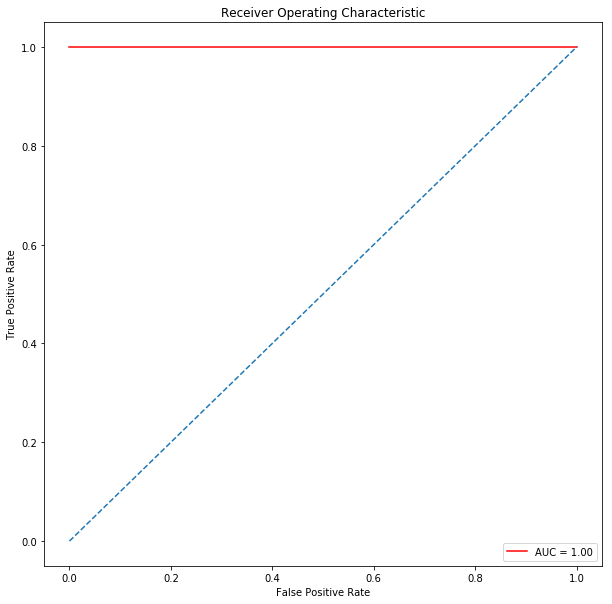

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='red',
         label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
pd.DataFrame(model_svm.cv_results_)

C:\Users\yamak\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\yamak\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\yamak\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\yamak\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.109011,0.020832,0.961686,0.964532,1,NaN,NaN,linear,"{'C': 1, 'kernel': 'linear'}",105,0.945085,0.953832,0.962142,0.958228,0.977839,0.981537,1.238763e-01,7.365190e-03,0.013376,0.012157
1,6.693677,0.041666,0.978920,0.980843,10,NaN,NaN,linear,"{'C': 10, 'kernel': 'linear'}",101,0.970005,0.973453,0.989843,0.987307,0.976916,0.981768,4.710633e-01,7.367044e-03,0.008222,0.005693
2,38.554437,0.025632,0.990922,0.991383,100,NaN,NaN,linear,"{'C': 100, 'kernel': 'linear'}",92,0.993539,0.991921,0.992613,0.989615,0.986611,0.992615,7.152402e+00,7.093970e-03,0.003071,0.001282
3,170.789104,0.026043,0.990922,0.991383,500,NaN,NaN,linear,"{'C': 500, 'kernel': 'linear'}",92,0.993539,0.991921,0.992613,0.989615,0.986611,0.992615,3.185420e+01,7.365920e-03,0.003071,0.001282
4,283.988450,0.031251,0.990922,0.991383,1000,NaN,NaN,linear,"{'C': 1000, 'kernel': 'linear'}",92,0.993539,0.991921,0.992613,0.989615,0.986611,0.992615,5.993237e+01,1.275679e-02,0.003071,0.001282
5,2.715396,0.477158,0.959532,1.000000,1,NaN,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",107,0.960314,1.000000,0.961681,1.000000,0.956602,1.000000,3.254468e-02,6.434420e-03,0.002146,0.000000
6,0.662093,0.171876,0.999692,1.000000,1,NaN,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",81,1.000000,1.000000,1.000000,1.000000,0.999077,1.000000,2.032740e-02,7.018853e-07,0.000435,0.000000
7,0.213545,0.072917,0.989537,0.990845,1,NaN,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",95,0.991694,0.990305,0.990766,0.991461,0.986150,0.990769,7.365639e-03,7.366089e-03,0.002425,0.000475
8,0.485987,0.171876,0.931990,0.932298,1,NaN,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",120,0.932626,0.936288,0.934441,0.929379,0.928901,0.931225,1.210456e-02,3.371748e-07,0.002306,0.002921
9,0.807301,0.286461,0.871980,0.872365,1,NaN,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",129,0.875865,0.870960,0.870729,0.872144,0.869344,0.873990,1.473173e-02,7.366201e-03,0.002805,0.001247
